<a href="https://colab.research.google.com/github/adityaras/Aditya_2018273_RL-M2020/blob/master/HW3/RL_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import copy
from tqdm import tqdm


## Q4

In [ ]:
card_value = {"K":10,"Q":10,"J":10,"A":[11,1]}
for i in range(2,11):
  card_value[i] = i
# print(len(card_value))

In [ ]:
def draw_card():
  card_ind = random.randint(1,14)
  if card_ind == 1:
    return  "A"
  if card_ind == 2:
    return  "K"
  if card_ind == 3:
    return  "Q"
  if card_ind == 4:
    return  "J"
  return card_ind

## Q6

In [ ]:
actions = [-1,1]
term = 1/6
true_val = [0,term, 2*term, 0.5, 4*term, 5*term,0]
# print(q_star)

In [ ]:
def next_step(state, action):
  state = state + action
  if state == 6:
    return state, 1
  else:
    return state, 0

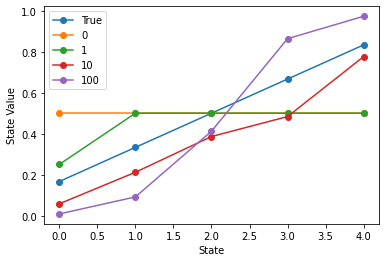

In [ ]:
state_value=np.zeros(7)
for i in range(1,len(state_value)-1):
  state_value[i] = 0.5
alphas = [0.1,0.15,0.05]
plt.plot(true_val, label = "True",marker="o")

for a in alphas:
  for ep in range(101):
    curr_state=len(state_value)//2
    if ep in [0,1,10,100] and a == 0.1:
      plt.plot(state_value[1:6], label = ep, marker = "o")
    while(True):

      action =  np.random.choice(actions)    
      next_state, reward=next_step(curr_state,action)
      state_value[curr_state]+=alpha*(state_value[next_state]+reward-state_value[curr_state])
      curr_state = copy.deepcopy(next_state)
      
      if curr_state == 6 or curr_state == 0:
        break

plt.xlabel('State')
plt.ylabel('State Value')
plt.legend(loc="best")         
plt.show()

In [ ]:
state_value=np.zeros(7)
for i in range(1,len(state_value)-1):
  state_value[i] = 0.5
alphas = [0.1,0.15,0.05]
rms = {}
for a in alphas:
  estimates=np.zeros(101)
  for _ in range(100):
    state_value=np.zeros(7)
    for i in range(1,len(state_value)-1):
      state_value[i] = 0.5
    for ep in range(101):
      curr_state=len(state_value)//2
      while(True):
        action =  np.random.choice(actions)    
        next_state, reward=next_step(curr_state,action)
        state_value[curr_state]+=alpha*(state_value[next_state]+reward-state_value[curr_state])
        curr_state = copy.deepcopy(next_state)
        if curr_state == 6 or curr_state == 0:
          break
      estimates[ep] += np.sqrt(np.sum(np.power(state_value-true_val,2)))
  rms[a] = estimates/100

In [ ]:
state_value=np.zeros(7)
for i in range(1,len(state_value)-1):
  state_value[i] = 0.5
alphas_list = [0.01,0.02,0.03,0.04]
rms2 = {}
for a in alphas_list:
  estimates=np.zeros(101)
  for _ in range(100):
    # state_value=np.zeros(7)
    for i in range(1,len(state_value)-1):
      state_value[i] = 0.5
    for ep in range(101):
      curr_state=len(state_value)//2
      visited_states = []
      visited_states.append(curr_state)
      while(True):
        action =  np.random.choice(actions)    
        next_state, reward=next_step(curr_state,action)
        
        curr_state  = copy.deepcopy(next_state)
        visited_states.append(curr_state)
        
        if curr_state == 6 or curr_state == 0:
          break

      for s in visited_states:
        state_value[s] += a*(reward - state_value[s])
        
      estimates[ep] += np.sqrt(np.sum(np.power(state_value[1:6]-true_val[1:6],2)))    

  rms2[a] = estimates/100

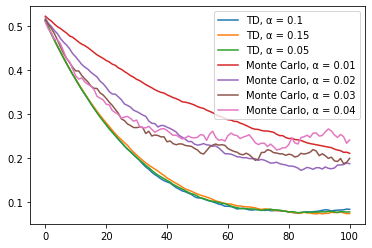

In [ ]:
for l in rms:
    plt.plot(rms[l],label = 'TD, \u03B1 = '+str(l))
for k in rms2:
    plt.plot(rms2[k],label = 'Monte Carlo, \u03B1 = '+str(k))
plt.legend()
plt.show()

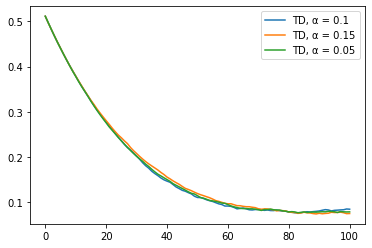

In [ ]:
for l in rms:
    plt.plot(rms[l],label = 'TD, \u03B1 = '+str(l))
plt.legend()
plt.show()

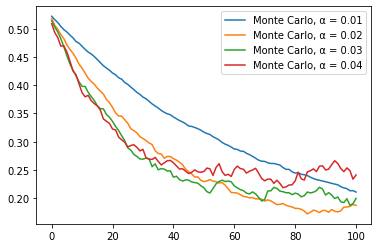

In [ ]:
for k in rms2:
    plt.plot(rms2[k],label = 'Monte Carlo, \u03B1 = '+str(k))
plt.legend()
plt.show()

## Q7


In [260]:
alpha = np.random.random()

episodes = 50
rows = 4
cols = 12
actions = {0:np.array([-1,0]), 1:np.array([0,1]), 2:np.array([1,0]), 3:np.array([0,-1])}
# 0: up, 1: right, 2: down, 3: left
no_actions = len(actions)

In [261]:
def next_step_q7(state,action):
  next_state = state + action
  if (next_state[0] < 0 or next_state[0] > rows - 1 or next_state[1] < 0 or next_state[1] > cols - 1):
    return state, -1
  
  if next_state[0] == rows - 1 and next_state[1]>0 and next_state[1]<cols-1:
    return np.array([rows-1,0]), -100
  return next_state, -1  

In [262]:
def sarsa(episodes, Q):
  reward = [0]*episodes
  # c=0
  # for ep in range(1):
  for ep in range(episodes):
    curr_state = np.array([rows-1,0])
    prob = np.random.random()
    # print(curr_state)

    if prob <= 0.1:
      act_ind = np.random.randint(0,4)
    else:
      act_ind = np.argmax(Q[str(curr_state)])
    
    while (True):
      # c+=1
      next_state, rew = next_step_q7(curr_state, actions[act_ind])
      
      prob1 = np.random.random()
      if prob1 <= 0.1:
        next_act_ind = np.random.randint(0,4)
      else:
        next_act_ind = np.argmax(Q[str(next_state)])

      Q[str(curr_state)][act_ind] += alpha*(rew + Q[str(next_state)][next_act_ind] - Q[str(curr_state)][act_ind])

      curr_state = copy.deepcopy(next_state)
      act_ind = copy.deepcopy(next_act_ind)

      reward[ep] += rew
      if str(curr_state)== str(np.array([rows-1,cols-1])):
        break
    reward[ep] = max(reward[ep],-100)
  return np.array(reward)   

In [263]:
tot_sarsa = np.zeros(episodes)
for _ in tqdm(range(500)):
  Q = {}
  for i in range(rows):
    for j in range(cols):
      if i == rows-1:
        Q[str(np.array([i,j]))] = [0,0,0,0]
      else:
        Q[str(np.array([i,j]))] = [np.random.random(),np.random.random(),np.random.random(),np.random.random()]
  # len(Q)
  tot_sarsa += sarsa(episodes,Q)
tot_sarsa = tot_sarsa/500







  0%|          | 0/500 [00:00<?, ?it/s]





  0%|          | 1/500 [00:00<05:02,  1.65it/s]





  0%|          | 2/500 [00:01<05:05,  1.63it/s]





  1%|          | 3/500 [00:01<05:11,  1.60it/s]





  1%|          | 4/500 [00:02<05:16,  1.57it/s]





  1%|          | 5/500 [00:03<05:19,  1.55it/s]





  1%|          | 6/500 [00:03<05:17,  1.55it/s]





  1%|▏         | 7/500 [00:04<05:12,  1.58it/s]





  2%|▏         | 8/500 [00:05<05:08,  1.59it/s]





  2%|▏         | 9/500 [00:05<05:18,  1.54it/s]





  2%|▏         | 10/500 [00:06<05:18,  1.54it/s]





  2%|▏         | 11/500 [00:07<05:13,  1.56it/s]





  2%|▏         | 12/500 [00:07<05:15,  1.55it/s]





  3%|▎         | 13/500 [00:08<05:06,  1.59it/s]





  3%|▎         | 14/500 [00:09<05:26,  1.49it/s]





  3%|▎         | 15/500 [00:09<05:19,  1.52it/s]





  3%|▎         | 16/500 [00:10<05:20,  1.51it/s]





  3%|▎         | 17/500 [00:10<05:12,  1.55it/s]





  4%|▎         | 18/500 [00:11<05:02,  1

In [264]:
def q_learn(episodes, Q):
  reward = [0]*episodes
  # for ep in range(1):
  for ep in range(episodes):
    curr_state = np.array([rows-1,0])
    
    while (True):
      prob = np.random.random()
      # print(curr_state)
      if prob <= 0.1:
        act_ind = np.random.randint(0,4)
      else:
        act_ind = np.argmax(Q[str(curr_state)])
      
      next_state, rew = next_step_q7(curr_state, actions[act_ind])
      
      prob1 = np.random.random()
      if prob1 <= 0.1:
        next_act_ind = np.random.randint(0,4)
      else:
        next_act_ind = np.argmax(Q[str(next_state)])

      Q[str(curr_state)][act_ind] += alpha*(rew + max(Q[str(next_state)]) - Q[str(curr_state)][act_ind])

      curr_state = copy.deepcopy(next_state)
      act_ind = copy.deepcopy(next_act_ind)

      reward[ep] += rew
      # print(curr_state)
      # break
      if curr_state[0]==rows-1 and curr_state[1]==cols-1:
        break
    reward[ep] = max(reward[ep],-100)
  return np.array(reward)   

In [265]:
tot_qlearn = np.zeros(episodes)
for _ in tqdm(range(500)):
  Q = {}
  for i in range(rows):
    for j in range(cols):
      if i == rows-1:
        Q[str(np.array([i,j]))] = [0,0,0,0]
      else:
        Q[str(np.array([i,j]))] = [np.random.random(),np.random.random(),np.random.random(),np.random.random()]
  # len(Q)
  tot_qlearn += sarsa(episodes,Q)
tot_qlearn = tot_qlearn/500







  0%|          | 0/500 [00:00<?, ?it/s]





  0%|          | 1/500 [00:00<05:09,  1.61it/s]





  0%|          | 2/500 [00:01<05:03,  1.64it/s]





  1%|          | 3/500 [00:01<05:05,  1.63it/s]





  1%|          | 4/500 [00:02<05:11,  1.59it/s]





  1%|          | 5/500 [00:03<05:11,  1.59it/s]





  1%|          | 6/500 [00:03<05:34,  1.48it/s]





  1%|▏         | 7/500 [00:04<05:24,  1.52it/s]





  2%|▏         | 8/500 [00:05<05:16,  1.55it/s]





  2%|▏         | 9/500 [00:05<05:32,  1.48it/s]





  2%|▏         | 10/500 [00:06<05:19,  1.53it/s]





  2%|▏         | 11/500 [00:07<05:15,  1.55it/s]





  2%|▏         | 12/500 [00:07<05:12,  1.56it/s]





  3%|▎         | 13/500 [00:08<05:09,  1.58it/s]





  3%|▎         | 14/500 [00:08<05:05,  1.59it/s]





  3%|▎         | 15/500 [00:09<05:13,  1.55it/s]





  3%|▎         | 16/500 [00:10<05:04,  1.59it/s]





  3%|▎         | 17/500 [00:10<04:59,  1.61it/s]





  4%|▎         | 18/500 [00:11<05:06,  1

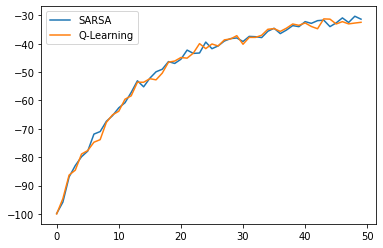

In [266]:
plt.plot(tot_sarsa, label = "SARSA")
plt.plot(tot_qlearn, label = "Q-Learning")
plt.legend()
plt.show()
